## Data Analysis: Part 1

### RQ1: What is the relationship between trends of Google search terms for dengue and the number of reported dengue cases in Singapore?

#### H1: The number of dengue-related Google searches is positively correlated with the number of reported dengue cases in Singapore.

#### H2: An increase in dengue-related Google searches will be followed by a slightly delayed increase (within 0-2 weeks) in the number of reported dengue cases in Singapore.

#### H3: An increase in the number of reported dengue cases in Singapore will be followed by a slightly delayed increased (within 0-2 weeks) in dengue-related Google searches

#### **Set up**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
google_trends = pd.read_csv('../data/cleaned/trends_clean.csv')
dengue_cases = pd.read_csv('../data/cleaned/dengue_clean.csv')

In [3]:
google_trends.shape

(574, 11)

In [4]:
dengue_cases.shape

(574, 3)

Apart from the relative popularity of the individual search terms within each year, we also hope to find out if a combined (sum) measure of all the search terms together would be useful. As such, we create a new column `sum` which aggregates (sums) all of the individual search terms' data together.

In [5]:
google_trends['sum'] = google_trends['dengue_fever'] + google_trends['dengue'] + google_trends['bone_pain'] + google_trends['rain'] + google_trends['mosquito_bite'] + google_trends['fever'] + google_trends['rashes'] + google_trends['rash'] + google_trends['mosquito']
google_trends

,year,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum
0,2022,1,0,11,0,87,30,54,26,66,39,313
1,2022,2,21,12,58,34,19,59,86,67,40,396
2,2022,3,11,16,0,43,19,64,75,70,58,356
3,2022,4,0,16,19,32,45,66,55,80,46,359
4,2022,5,0,13,44,53,56,64,76,76,44,426
...,...,...,...,...,...,...,...,...,...,...,...,...
569,2012,49,63,60,45,36,0,89,42,71,84,490
570,2012,50,33,32,0,49,0,94,49,65,67,389
571,2012,51,60,59,87,47,0,86,90,76,50,555
572,2012,52,63,49,36,57,51,86,55,62,61,520


Now, the last step before starting our analysis is to combine the Trends data with the actual number of dengue cases reported for each epidemiological year/week.

In [6]:
google_dengue = google_trends.merge(dengue_cases, how='inner')
google_dengue

,year,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases
0,2022,1,0,11,0,87,30,54,26,66,39,313,106
1,2022,2,21,12,58,34,19,59,86,67,40,396,146
2,2022,3,11,16,0,43,19,64,75,70,58,356,180
3,2022,4,0,16,19,32,45,66,55,80,46,359,171
4,2022,5,0,13,44,53,56,64,76,76,44,426,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,2012,48,14,17,46,46,0,79,55,69,73,399,80
568,2012,49,63,60,45,36,0,89,42,71,84,490,78
569,2012,50,33,32,0,49,0,94,49,65,67,389,105
570,2012,51,60,59,87,47,0,86,90,76,50,555,94


We perform a quick sanity to check to make sure that there are no missing data.

In [7]:
google_dengue.describe()

,year,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,2017.000000,26.500000,42.590909,48.265734,36.729021,53.283217,31.666084,67.562937,63.991259,71.248252,54.520979,469.858392,286.879371
std,3.165046,15.021467,23.741983,22.771061,24.911859,14.431317,26.173917,15.995223,16.751870,12.997558,22.761104,87.688926,296.385176
min,2012.000000,1.000000,0.000000,0.000000,0.000000,23.000000,0.000000,22.000000,11.000000,14.000000,3.000000,233.000000,24.000000
25%,2014.000000,13.750000,25.000000,30.000000,20.000000,43.000000,10.000000,58.000000,53.000000,63.000000,40.000000,407.750000,81.000000
50%,2017.000000,26.500000,40.000000,46.000000,37.000000,51.000000,30.000000,67.000000,64.000000,71.000000,58.000000,467.000000,210.500000
75%,2020.000000,39.250000,58.000000,66.000000,53.000000,60.000000,46.000000,78.000000,75.000000,79.250000,70.250000,527.000000,374.000000
max,2022.000000,52.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,713.000000,1792.000000


In [8]:
google_dengue.isnull().values.any()

False

#### **H1: The number of dengue-related Google searches is positively correlated with the number of reported dengue cases in Singapore.**

As the data from Google Trends is relative for each year, our approach in evaluating this hypothesis is to calculate the correlation coefficients between search terms and the number of dengue cases for each year, and then find the average of the correlation coefficients across the years. 

In [9]:
corrs = []

for year, year_data in google_dengue.groupby('year'):
    corrs.append(year_data.corr())
    
corrs_df = pd.concat(corrs)
corr_overall = corrs_df.groupby(corrs_df.index, sort=False).mean()
corr_overall.drop('year', inplace=True)
corr_overall.drop('year', axis=1, inplace=True)

corr_overall

,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases
week,1.000000,-0.078152,-0.007942,0.032629,0.095683,0.029650,-0.195734,-0.018859,-0.090467,-0.004494,-0.049920,0.029934
dengue_fever,-0.078152,1.000000,0.676527,0.046893,-0.056837,0.211714,0.438473,0.130679,0.126622,0.287115,0.690546,0.508233
dengue,-0.007942,0.676527,1.000000,0.003342,-0.080106,0.279014,0.421477,0.163257,0.146422,0.429634,0.698458,0.619316
bone_pain,0.032629,0.046893,0.003342,1.000000,0.015105,-0.028953,-0.017664,0.077543,0.072960,-0.003556,0.347688,-0.023044
rain,0.095683,-0.056837,-0.080106,0.015105,1.000000,0.019861,-0.093377,-0.150994,-0.055398,-0.009830,0.080163,-0.069806
mosquito_bite,0.029650,0.211714,0.279014,-0.028953,0.019861,1.000000,0.059408,0.114198,0.106318,0.324796,0.561630,0.188003
fever,-0.195734,0.438473,0.421477,-0.017664,-0.093377,0.059408,1.000000,0.176077,0.120699,0.145281,0.455232,0.264936
rashes,-0.018859,0.130679,0.163257,0.077543,-0.150994,0.114198,0.176077,1.000000,0.148004,0.097888,0.387760,0.158550
rash,-0.090467,0.126622,0.146422,0.072960,-0.055398,0.106318,0.120699,0.148004,1.000000,0.164552,0.355929,0.109797
mosquito,-0.004494,0.287115,0.429634,-0.003556,-0.009830,0.324796,0.145281,0.097888,0.164552,1.000000,0.529111,0.270970


For a better and more concise visual representation of the correlation matrix, we reduce the number of digits shown and color the cells according to the strength/magnitude of the correlations.

In [10]:
mask = np.zeros_like(corr_overall, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_overall[mask] = np.nan
(corr_overall.style.background_gradient(cmap='twilight_shifted', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1').format(precision=3))

,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases
week,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dengue_fever,-0.078,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dengue,-0.008,0.677,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bone_pain,0.033,0.047,0.003,nan,nan,nan,nan,nan,nan,nan,nan,nan
rain,0.096,-0.057,-0.080,0.015,nan,nan,nan,nan,nan,nan,nan,nan
mosquito_bite,0.030,0.212,0.279,-0.029,0.020,nan,nan,nan,nan,nan,nan,nan
fever,-0.196,0.438,0.421,-0.018,-0.093,0.059,nan,nan,nan,nan,nan,nan
rashes,-0.019,0.131,0.163,0.078,-0.151,0.114,0.176,nan,nan,nan,nan,nan
rash,-0.090,0.127,0.146,0.073,-0.055,0.106,0.121,0.148,nan,nan,nan,nan
mosquito,-0.004,0.287,0.430,-0.004,-0.010,0.325,0.145,0.098,0.165,nan,nan,nan


We see that the correlation between dengue-related Google search terms and dengue cases is positive and of moderate strength (r = +0.451). This broadly aligns with H1.

/tmp/ipykernel_2031925/2330641604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Epi Week'] = df['year'].astype('str') + '-' + df['week'].astype('str') + '-1'
/tmp/ipykernel_2031925/2330641604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year-Epi Week'], format='%Y-%W-%w')


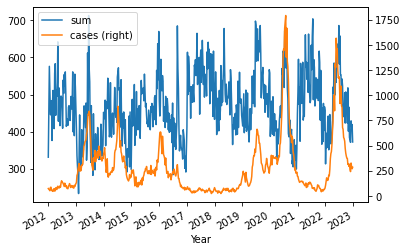

In [11]:
df = google_dengue[['sum', 'cases', 'year', 'week']]
df['Year-Epi Week'] = df['year'].astype('str') + '-' + df['week'].astype('str') + '-1'
df['Year'] = pd.to_datetime(df['Year-Epi Week'], format='%Y-%W-%w')
df = df.set_index('Year')
df = df.drop(['year', 'week'], axis=1)
ax = df.plot.line(secondary_y=['cases'])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

Given the moderately strong, positive correlation, we expected the plotted lines to present relatively similar trends. Apart from periods in 2012, 2018 and 2021, we see that the two lines largely display similar trends. This fulfills our expectations of a positive correlation of moderate strength.

Referring back to our correlation matrix, we can infer a clear difference between 2 types of terms:
1. terms directly referencing dengue: `dengue fever` (r = +0.508), `dengue` (r + +0.619)
2. terms indirectly referencing dengue (i.e. symptoms of dengue, potential predictors of dengue like weather): `bone pain`, `rain`, `mosquito bite`, `fever`, `rashes`, `rash`, `mosquito`

Since the terms that indirectly reference dengue have much weaker correlations with the number of dengue cases than the direct terms, it may be logical to group these 2 types of terms together and analyze them separately, rather than aggregating all of the terms under one umbrella `sum` as we have done so far. Thus, we regroup the terms and look at the correlations again.

In grouping terms that indirectly reference dengue, we have chosen to exclude 'bone pain' and 'rain' as they produce not only negative, but also negligible correlation coefficients. The other terms produce weak (but less negligible) and positive correlation coefficients, so grouping them together made more sense to us.

In [12]:
google_dengue['direct_terms'] = google_dengue['dengue_fever'] + google_dengue['dengue']
google_dengue['indirect_terms'] = google_dengue['mosquito_bite'] + google_dengue['fever'] + google_dengue['rashes'] + google_dengue['rash'] + google_dengue['mosquito']

In [13]:
corrs2 = []

for year, year_data in google_dengue.groupby('year'):
    corrs2.append(year_data.corr())
    
corrs2_df = pd.concat(corrs2)
corr2_overall = corrs2_df.groupby(corrs2_df.index, sort=False).mean()
corr2_overall.drop('year', inplace=True)
corr2_overall.drop('year', axis=1, inplace=True)
corr2_overall

,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases,direct_terms,indirect_terms
week,1.000000,-0.078152,-0.007942,0.032629,0.095683,0.029650,-0.195734,-0.018859,-0.090467,-0.004494,-0.049920,0.029934,-0.042331,-0.071120
dengue_fever,-0.078152,1.000000,0.676527,0.046893,-0.056837,0.211714,0.438473,0.130679,0.126622,0.287115,0.690546,0.508233,0.938998,0.383893
dengue,-0.007942,0.676527,1.000000,0.003342,-0.080106,0.279014,0.421477,0.163257,0.146422,0.429634,0.698458,0.619316,0.882049,0.472544
bone_pain,0.032629,0.046893,0.003342,1.000000,0.015105,-0.028953,-0.017664,0.077543,0.072960,-0.003556,0.347688,-0.023044,0.026857,0.030383
rain,0.095683,-0.056837,-0.080106,0.015105,1.000000,0.019861,-0.093377,-0.150994,-0.055398,-0.009830,0.080163,-0.069806,-0.068472,-0.091758
mosquito_bite,0.029650,0.211714,0.279014,-0.028953,0.019861,1.000000,0.059408,0.114198,0.106318,0.324796,0.561630,0.188003,0.257218,0.732233
fever,-0.195734,0.438473,0.421477,-0.017664,-0.093377,0.059408,1.000000,0.176077,0.120699,0.145281,0.455232,0.264936,0.455832,0.412220
rashes,-0.018859,0.130679,0.163257,0.077543,-0.150994,0.114198,0.176077,1.000000,0.148004,0.097888,0.387760,0.158550,0.154280,0.521934
rash,-0.090467,0.126622,0.146422,0.072960,-0.055398,0.106318,0.120699,0.148004,1.000000,0.164552,0.355929,0.109797,0.146387,0.438827
mosquito,-0.004494,0.287115,0.429634,-0.003556,-0.009830,0.324796,0.145281,0.097888,0.164552,1.000000,0.529111,0.270970,0.367486,0.592503


In [14]:
mask2 = np.zeros_like(corr2_overall, dtype=bool)
mask2[np.triu_indices_from(mask2)] = True
corr2_overall[mask2] = np.nan
(corr2_overall.style.background_gradient(cmap='twilight_shifted', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1').format(precision=3))

,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases,direct_terms,indirect_terms
week,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dengue_fever,-0.078,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dengue,-0.008,0.677,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bone_pain,0.033,0.047,0.003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rain,0.096,-0.057,-0.080,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mosquito_bite,0.030,0.212,0.279,-0.029,0.020,nan,nan,nan,nan,nan,nan,nan,nan,nan
fever,-0.196,0.438,0.421,-0.018,-0.093,0.059,nan,nan,nan,nan,nan,nan,nan,nan
rashes,-0.019,0.131,0.163,0.078,-0.151,0.114,0.176,nan,nan,nan,nan,nan,nan,nan
rash,-0.090,0.127,0.146,0.073,-0.055,0.106,0.121,0.148,nan,nan,nan,nan,nan,nan
mosquito,-0.004,0.287,0.430,-0.004,-0.010,0.325,0.145,0.098,0.165,nan,nan,nan,nan,nan


The correlation coefficient of direct dengue-related terms with reported dengue cases is +0.590, while the correlation coefficient of indirect dengue-related terms with dengue cases is +0.321.

Both correlations are positive, but we can see that direct dengue-related terms show a stronger correlation to reported dengue cases.

/tmp/ipykernel_2031925/2937702225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year-Epi Week'] = df2['year'].astype('str') + '-' + df2['week'].astype('str') + '-1'
/tmp/ipykernel_2031925/2937702225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = pd.to_datetime(df2['Year-Epi Week'], format='%Y-%W-%w')


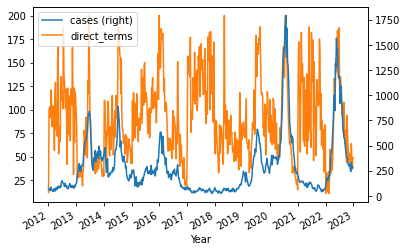

In [15]:
df2 = google_dengue[['cases','direct_terms','year','week']]
df2['Year-Epi Week'] = df2['year'].astype('str') + '-' + df2['week'].astype('str') + '-1'
df2['Year'] = pd.to_datetime(df2['Year-Epi Week'], format='%Y-%W-%w')
df2 = df2.set_index('Year')
df2 = df2.drop(['year', 'week'], axis=1)
ax = df2.plot.line(secondary_y=['cases'])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

/tmp/ipykernel_2031925/2081854496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year-Epi Week'] = df3['year'].astype('str') + '-' + df3['week'].astype('str') + '-1'
/tmp/ipykernel_2031925/2081854496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = pd.to_datetime(df3['Year-Epi Week'], format='%Y-%W-%w')


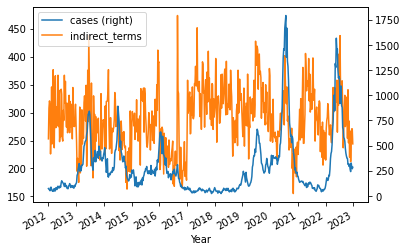

In [16]:
df3 = google_dengue[['cases','indirect_terms','year','week']]
df3['Year-Epi Week'] = df3['year'].astype('str') + '-' + df3['week'].astype('str') + '-1'
df3['Year'] = pd.to_datetime(df3['Year-Epi Week'], format='%Y-%W-%w')
df3 = df3.set_index('Year')
df3 = df3.drop(['year', 'week'], axis=1)
ax = df3.plot.line(secondary_y=['cases'])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

It is noteworthy that direct dengue-related terms also show a stronger correlation to reported dengue cases than the aggregated sum of all dengue-related terms. For subsequent analyses, we decided that it is perhaps more logical to separate the 2 types of terms as combining them doesn't show the nuanced difference between the types of terms.

#### **H2: An increase in dengue-related Google searches will be followed by a slightly delayed increase (within 0-2 weeks) in the number of reported dengue cases in Singapore.**

Given that it usually takes about 1 week for dengue symptoms to develop, we theorized that fluctuations in search terms could actually indicate fluctuations in dengue cases 1 week later. In other words, there could be a 1 week delay between a rise in dengue-related Google searches and a subsequent rise in dengue cases.

In [17]:
# 1 week delay
google_dengue['cases1'] = google_dengue['cases'].shift(-1)
# 2 week delay
google_dengue['cases2'] = google_dengue['cases'].shift(-2)
google_dengue

,year,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases,direct_terms,indirect_terms,cases1,cases2
0,2022,1,0,11,0,87,30,54,26,66,39,313,106,11,215,146.0,180.0
1,2022,2,21,12,58,34,19,59,86,67,40,396,146,33,271,180.0,171.0
2,2022,3,11,16,0,43,19,64,75,70,58,356,180,27,286,171.0,154.0
3,2022,4,0,16,19,32,45,66,55,80,46,359,171,16,292,154.0,169.0
4,2022,5,0,13,44,53,56,64,76,76,44,426,154,13,316,169.0,206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,2012,48,14,17,46,46,0,79,55,69,73,399,80,31,276,78.0,105.0
568,2012,49,63,60,45,36,0,89,42,71,84,490,78,123,286,105.0,94.0
569,2012,50,33,32,0,49,0,94,49,65,67,389,105,65,275,94.0,112.0
570,2012,51,60,59,87,47,0,86,90,76,50,555,94,119,302,112.0,NaN


In [18]:
corrs3 = []

for year, year_data in google_dengue.groupby('year'):
    corrs3.append(year_data.corr())
    
corrs3_df = pd.concat(corrs3)
corr3_overall = corrs3_df.groupby(corrs3_df.index, sort=False).mean()
corr3_overall.drop('year', inplace=True)
corr3_overall.drop('year', axis=1, inplace=True)
corr3_overall

,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases,direct_terms,indirect_terms,cases1,cases2
week,1.000000,-0.078152,-0.007942,0.032629,0.095683,0.029650,-0.195734,-0.018859,-0.090467,-0.004494,-0.049920,0.029934,-0.042331,-0.071120,-0.003195,0.014889
dengue_fever,-0.078152,1.000000,0.676527,0.046893,-0.056837,0.211714,0.438473,0.130679,0.126622,0.287115,0.690546,0.508233,0.938998,0.383893,0.428583,0.394131
dengue,-0.007942,0.676527,1.000000,0.003342,-0.080106,0.279014,0.421477,0.163257,0.146422,0.429634,0.698458,0.619316,0.882049,0.472544,0.508202,0.453309
bone_pain,0.032629,0.046893,0.003342,1.000000,0.015105,-0.028953,-0.017664,0.077543,0.072960,-0.003556,0.347688,-0.023044,0.026857,0.030383,-0.050109,-0.016642
rain,0.095683,-0.056837,-0.080106,0.015105,1.000000,0.019861,-0.093377,-0.150994,-0.055398,-0.009830,0.080163,-0.069806,-0.068472,-0.091758,-0.062284,-0.032083
mosquito_bite,0.029650,0.211714,0.279014,-0.028953,0.019861,1.000000,0.059408,0.114198,0.106318,0.324796,0.561630,0.188003,0.257218,0.732233,0.202473,0.188513
fever,-0.195734,0.438473,0.421477,-0.017664,-0.093377,0.059408,1.000000,0.176077,0.120699,0.145281,0.455232,0.264936,0.455832,0.412220,0.213371,0.202325
rashes,-0.018859,0.130679,0.163257,0.077543,-0.150994,0.114198,0.176077,1.000000,0.148004,0.097888,0.387760,0.158550,0.154280,0.521934,0.121483,0.120208
rash,-0.090467,0.126622,0.146422,0.072960,-0.055398,0.106318,0.120699,0.148004,1.000000,0.164552,0.355929,0.109797,0.146387,0.438827,0.081245,0.112653
mosquito,-0.004494,0.287115,0.429634,-0.003556,-0.009830,0.324796,0.145281,0.097888,0.164552,1.000000,0.529111,0.270970,0.367486,0.592503,0.235327,0.207504


In [19]:
mask3 = np.zeros_like(corr3_overall, dtype=bool)
mask3[np.triu_indices_from(mask3)] = True
corr3_overall[mask3] = np.nan
(corr3_overall.style.background_gradient(cmap='twilight_shifted', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1').format(precision=3))

,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases,direct_terms,indirect_terms,cases1,cases2
week,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dengue_fever,-0.078,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dengue,-0.008,0.677,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bone_pain,0.033,0.047,0.003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rain,0.096,-0.057,-0.080,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mosquito_bite,0.030,0.212,0.279,-0.029,0.020,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fever,-0.196,0.438,0.421,-0.018,-0.093,0.059,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rashes,-0.019,0.131,0.163,0.078,-0.151,0.114,0.176,nan,nan,nan,nan,nan,nan,nan,nan,nan
rash,-0.090,0.127,0.146,0.073,-0.055,0.106,0.121,0.148,nan,nan,nan,nan,nan,nan,nan,nan
mosquito,-0.004,0.287,0.430,-0.004,-0.010,0.325,0.145,0.098,0.165,nan,nan,nan,nan,nan,nan,nan


The relevant correlation coefficient values are between:
- `cases1` and `direct_terms`: +0.484
- `cases1` and `indirect_terms`: +0.283
- `cases2` and `direct_terms`: +0.439
- `cases2` and `indirect_terms`: +0.279

Introducing delays weakened the positive correlations between dengue cases and the 2 types of dengue terms. As such, we do not have compelling evidence to support H2. 

We then asked, what if the direction of the lag was reversed?

#### **H3: An increase in the number of reported dengue cases in Singapore will be followed by a slightly delayed increased (within 0-2 weeks) in dengue-related Google searches.**


In [20]:
# 1 week delay
google_dengue['cases3']=google_dengue['cases'].shift(1)
# 2 week delay
google_dengue['cases4']=google_dengue['cases'].shift(2)
google_dengue

,year,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases,direct_terms,indirect_terms,cases1,cases2,cases3,cases4
0,2022,1,0,11,0,87,30,54,26,66,39,313,106,11,215,146.0,180.0,NaN,NaN
1,2022,2,21,12,58,34,19,59,86,67,40,396,146,33,271,180.0,171.0,106.0,NaN
2,2022,3,11,16,0,43,19,64,75,70,58,356,180,27,286,171.0,154.0,146.0,106.0
3,2022,4,0,16,19,32,45,66,55,80,46,359,171,16,292,154.0,169.0,180.0,146.0
4,2022,5,0,13,44,53,56,64,76,76,44,426,154,13,316,169.0,206.0,171.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,2012,48,14,17,46,46,0,79,55,69,73,399,80,31,276,78.0,105.0,100.0,88.0
568,2012,49,63,60,45,36,0,89,42,71,84,490,78,123,286,105.0,94.0,80.0,100.0
569,2012,50,33,32,0,49,0,94,49,65,67,389,105,65,275,94.0,112.0,78.0,80.0
570,2012,51,60,59,87,47,0,86,90,76,50,555,94,119,302,112.0,NaN,105.0,78.0


In [21]:
corrs4 = []

for year, year_data in google_dengue.groupby('year'):
    corrs4.append(year_data.corr())
    
corrs4_df = pd.concat(corrs4)
corr4_overall = corrs4_df.groupby(corrs4_df.index, sort=False).mean()
corr4_overall.drop('year', inplace=True)
corr4_overall.drop('year', axis=1, inplace=True)
corr4_overall

,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases,direct_terms,indirect_terms,cases1,cases2,cases3,cases4
week,1.000000,-0.078152,-0.007942,0.032629,0.095683,0.029650,-0.195734,-0.018859,-0.090467,-0.004494,-0.049920,0.029934,-0.042331,-0.071120,-0.003195,0.014889,-0.032082,-0.054481
dengue_fever,-0.078152,1.000000,0.676527,0.046893,-0.056837,0.211714,0.438473,0.130679,0.126622,0.287115,0.690546,0.508233,0.938998,0.383893,0.428583,0.394131,0.454601,0.432165
dengue,-0.007942,0.676527,1.000000,0.003342,-0.080106,0.279014,0.421477,0.163257,0.146422,0.429634,0.698458,0.619316,0.882049,0.472544,0.508202,0.453309,0.558289,0.493062
bone_pain,0.032629,0.046893,0.003342,1.000000,0.015105,-0.028953,-0.017664,0.077543,0.072960,-0.003556,0.347688,-0.023044,0.026857,0.030383,-0.050109,-0.016642,-0.006386,0.010759
rain,0.095683,-0.056837,-0.080106,0.015105,1.000000,0.019861,-0.093377,-0.150994,-0.055398,-0.009830,0.080163,-0.069806,-0.068472,-0.091758,-0.062284,-0.032083,0.011577,0.051920
mosquito_bite,0.029650,0.211714,0.279014,-0.028953,0.019861,1.000000,0.059408,0.114198,0.106318,0.324796,0.561630,0.188003,0.257218,0.732233,0.202473,0.188513,0.124506,0.092982
fever,-0.195734,0.438473,0.421477,-0.017664,-0.093377,0.059408,1.000000,0.176077,0.120699,0.145281,0.455232,0.264936,0.455832,0.412220,0.213371,0.202325,0.255266,0.225629
rashes,-0.018859,0.130679,0.163257,0.077543,-0.150994,0.114198,0.176077,1.000000,0.148004,0.097888,0.387760,0.158550,0.154280,0.521934,0.121483,0.120208,0.120303,0.124401
rash,-0.090467,0.126622,0.146422,0.072960,-0.055398,0.106318,0.120699,0.148004,1.000000,0.164552,0.355929,0.109797,0.146387,0.438827,0.081245,0.112653,0.099418,0.098370
mosquito,-0.004494,0.287115,0.429634,-0.003556,-0.009830,0.324796,0.145281,0.097888,0.164552,1.000000,0.529111,0.270970,0.367486,0.592503,0.235327,0.207504,0.227939,0.180685


In [22]:
mask4 = np.zeros_like(corr4_overall, dtype=bool)
mask4[np.triu_indices_from(mask4)] = True
corr4_overall[mask4] = np.nan
(corr4_overall.style.background_gradient(cmap='twilight_shifted', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1').format(precision=3))

,week,dengue_fever,dengue,bone_pain,rain,mosquito_bite,fever,rashes,rash,mosquito,sum,cases,direct_terms,indirect_terms,cases1,cases2,cases3,cases4
week,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dengue_fever,-0.078,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dengue,-0.008,0.677,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bone_pain,0.033,0.047,0.003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rain,0.096,-0.057,-0.080,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mosquito_bite,0.030,0.212,0.279,-0.029,0.020,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fever,-0.196,0.438,0.421,-0.018,-0.093,0.059,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rashes,-0.019,0.131,0.163,0.078,-0.151,0.114,0.176,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rash,-0.090,0.127,0.146,0.073,-0.055,0.106,0.121,0.148,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mosquito,-0.004,0.287,0.430,-0.004,-0.010,0.325,0.145,0.098,0.165,nan,nan,nan,nan,nan,nan,nan,nan,nan


The relevant correlation coefficient values are between:
- `cases3` and `direct_terms`: +0.524
- `cases3` and `indirect_terms`: +0.254
- `cases4` and `direct_terms`: +0.483
- `cases4` and `indirect_terms`: +0.215

Introducing delays in the opposite direction also weakened the positive correlations between dengue cases and the 2 types of dengue terms. As such, we do not have compelling evidence to support H3. 

Overall, we conclude that timely Google searches have a stronger relationship with reported dengue cases. 

_Thinking back, this might make sense as the time when people tend to make Google searches would likely be when they are starting to experience some symptoms (e.g., persistent fever, body ache) and think that it might be related to dengue. Hence, the time delay between the actual searches and diagnosis of dengue may be quite short, and not so much due to the onset delay of symptoms after being bitten by an Aedes aegypti mosquito._